In [ ]:
"""
e-ticaret siteleri için pazarlama/marketing stratejisi

e-ticaret sitesi: elimizde veri var,
                    biz bu veri ile kime hangi ürünü önermeliyiz bunu öğrenmek istiyoruz diyor

developer: 1 verinin içeriğini bizim belirlememiz gerekiyor. Musteri bilgileri: konum, maaş, harcamaları,aldıkları ürünler
            kime: musteri segmentasyonu
            hangi urunu: recommendation system

musteri_egmentasyonu verisi -> musteriler segmente edeceğiz

"""

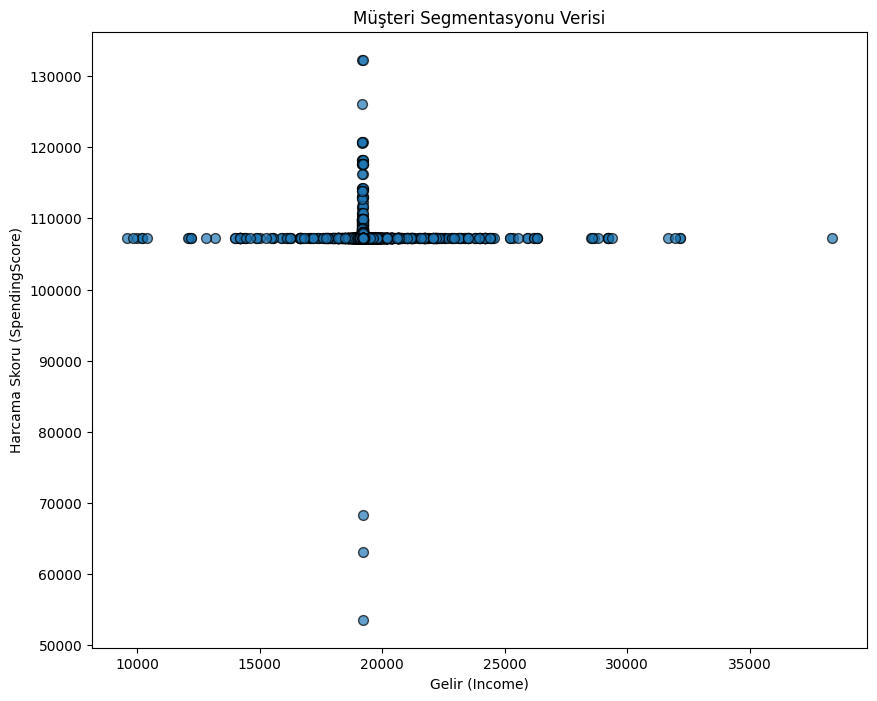

In [1]:
# %% veriyi incelemek

import numpy as np  # Sayısal işlemler için
import pandas as pd  # Veri işleme için
import matplotlib.pyplot as plt  # Grafik çizimi için
from sklearn.cluster import KMeans  # Kümeleme algoritması
from scipy.cluster.hierarchy import dendrogram, linkage  # Hiyerarşik kümeleme görselleştirmesi için

# Veri yükleme
data = pd.read_csv("musteri_segmentasyonu_dataset.csv", encoding="latin1")  # Dosyayı oku

# Sadece sayısal sütunları al ve numpy dizisine çevir
X = data.select_dtypes(include=[np.number]).values

# Mutlak değer düzeltmesi: minimum değerler negatifse pozitif yapmak için kaydırma
X[:,0] = np.abs(2 * min(X[:,0])) + X[:,0]  
X[:,1] = np.abs(2 * min(X[:,1])) + X[:,1]  

# Müşteri verilerinin gelir ve harcama skoruna göre dağılımını gösteren grafik
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], edgecolors="k", alpha=0.7, s=50)
plt.title("Müşteri Segmentasyonu Verisi")
plt.xlabel("Gelir (Income)")
plt.ylabel("Harcama Skoru (SpendingScore)")
plt.show()

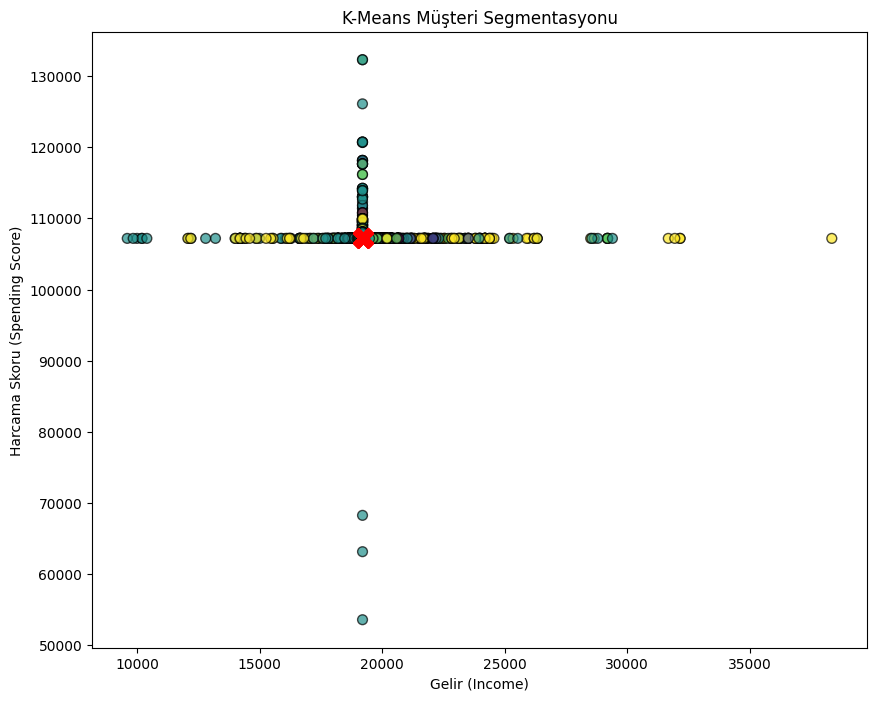

In [2]:
# %% clustering modeli oluşturmak -> unsupervised learning(KMeans)

from sklearn.impute import SimpleImputer  # Eksik değerleri doldurmak için
from sklearn.cluster import KMeans  # KMeans algoritması için
import matplotlib.pyplot as plt  # Grafik çizimi için

# Eksik değerleri ortalama ile doldur
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# KMeans modeli oluştur ve eğit
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
kmeans.fit(X)

cluster_labels = kmeans.labels_  # Her örneğin hangi kümeye ait olduğu
cluster_centers = kmeans.cluster_centers_  # Kümelerin merkez noktaları

# Sonuçların görselleştirilmesi
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap="viridis", marker="o", edgecolors="k", s=50, alpha=0.7)  # Veri noktaları
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c="red", marker="X", s=200)  # Küme merkezleri
plt.title("K-Means Müşteri Segmentasyonu")
plt.xlabel("Gelir (Income)")
plt.ylabel("Harcama Skoru (Spending Score)")
plt.show()

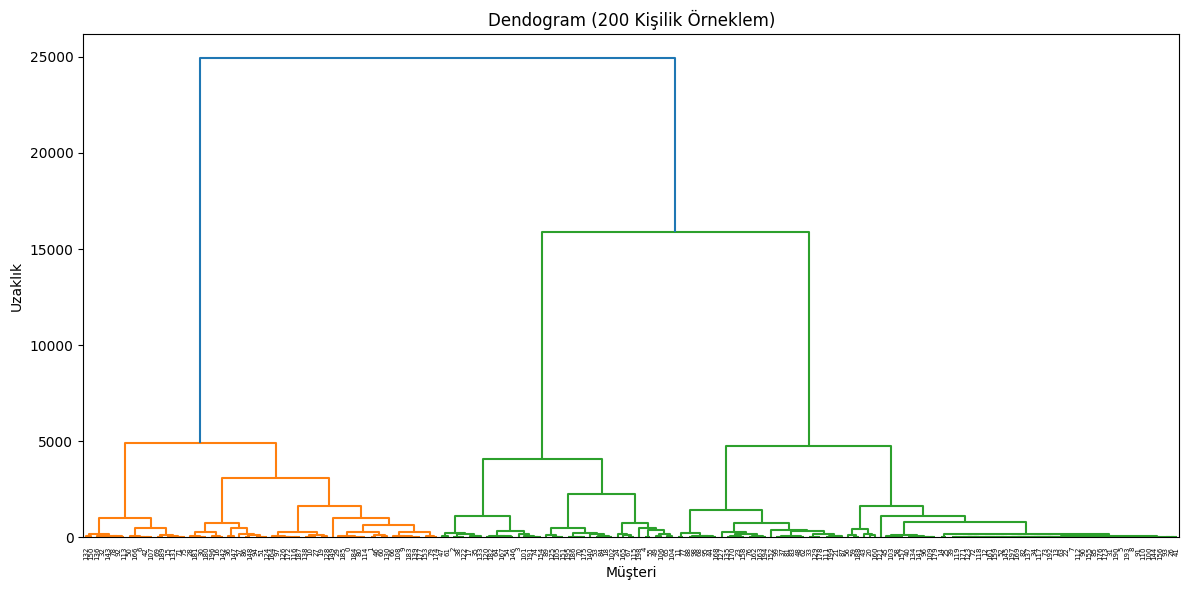

In [3]:
# Görselleştirme (Dendogram)

from sklearn.utils import resample  # Veri örneklemesi için

# Veriden rastgele 200 müşteri seç (örneklem)
X_sample = resample(X, n_samples=200, random_state=42)

# Linkage matrisi oluştur (ward yöntemi ile hiyerarşik kümeleme)
linkage_matrix = linkage(X_sample, method="ward")

# Dendrogram çizimi
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Dendogram (200 Kişilik Örneklem)")
plt.xlabel("Müşteri")
plt.ylabel("Uzaklık")
plt.tight_layout()
plt.show()